In [44]:
import networkx as nx
from generate_graphs import generate_user_graph, generate_tweets_graph
import matplotlib.pyplot as plt
import collections

In [45]:
graph = nx.DiGraph(generate_user_graph())

In [46]:
n, m = len(graph.nodes()), len(graph.edges())

In [57]:
def plot_degree_dist(gr, att_list=None, figname=None):
    if att_list is None:
        degree_sequences = [sorted([d for n, d in gr.degree()], reverse=True)]
    else:
        if not isinstance(att_list, list):
            print('please specify attribute names list')
            return
        else:
            degree_sequences = [sorted([gr.degree(node[0]) for node in gr.nodes(data=True) if node[1]['label'] == att]) for att in att_list]
    for deg_seq in degree_sequences:
        degree_count = collections.Counter(deg_seq)
        deg, cnt = zip(*degree_count.items())
        plt.loglog(deg, cnt)
    plt.grid()
    if figname is not None:
        plt.savefig('{}.png'.format(figname))
    plt.show()

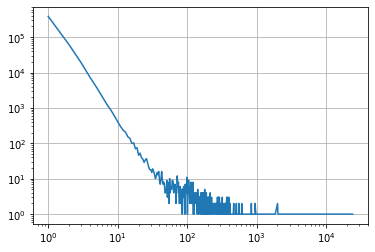

In [58]:
plot_degree_dist(graph, figname="users")

In [49]:
edges_list, node_attributes = generate_tweets_graph()
graph_tweets = nx.DiGraph(edges_list)

In [50]:
nx.set_node_attributes(graph_tweets, values=node_attributes, name='label')

In [51]:
distinct_att = set(val for key, val in node_attributes.items())
distinct_att

{'false', 'non-rumor', 'true', 'unverified'}

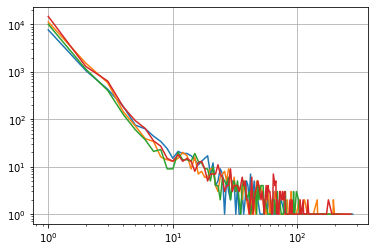

In [59]:
plot_degree_dist(graph_tweets, att_list=list(distinct_att),figname="tweets_by_label")